In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Epics Dataset/Dataset.zip"


Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Train/Cataract/cat_0_8576.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8586.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8587.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8591.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8592.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8593.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8594.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8595.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8596.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8597.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8600.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8603.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8609.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8610.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8612.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8613.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8614.jpg  
  inflating: Dataset/Train/Cataract/cat_0_8615.j

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path="/content/Dataset/Train"
test_path="/content/Dataset/Test"
val_path="/content/Dataset/Test"

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(75,75))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(75,75))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(75,75))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (75, 75),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (75, 75),
                                            batch_size = 32,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (75, 75),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8068 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'Cataract': 0, 'Normal': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((8068,), (1600,), (1600,))

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
# Add a final sigmoid layer with 1 node for classification output
x = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
253/253 [==============================] - 18s 31ms/step - loss: 0.4758 - accuracy: 0.7759 - val_loss: 0.2722 - val_accuracy: 0.9013
Epoch 2/10
253/253 [==============================] - 5s 21ms/step - loss: 0.2942 - accuracy: 0.8844 - val_loss: 0.2376 - val_accuracy: 0.9069
Epoch 3/10
253/253 [==============================] - 6s 22ms/step - loss: 0.2288 - accuracy: 0.9105 - val_loss: 0.2112 - val_accuracy: 0.9187
Epoch 4/10
253/253 [==============================] - 5s 21ms/step - loss: 0.1942 - accuracy: 0.9281 - val_loss: 0.2014 - val_accuracy: 0.9262
Epoch 5/10
253/253 [==============================] - 6s 24ms/step - loss: 0.1568 - accuracy: 0.9447 - val_loss: 0.1796 - val_accuracy: 0.9344
Epoch 6/10
253/253 [==============================] - 6s 22ms/step - loss: 0.1333 - accuracy: 0.9538 - val_loss: 0.1963 - val_accuracy: 0.9362
Epoch 7/10
253/253 [==============================] - 5s 22ms/step - loss: 0.1129 - accuracy: 0.9585 - val_loss: 0.1726 - val_accuracy: 0.941

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

50/50 [==============================] - 1s 19ms/step - loss: 0.1698 - accuracy: 0.9450


[0.16981130838394165, 0.9449999928474426]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=model.predict(test_x)
y_classes = ((y_pred > 0.5)+0).ravel()
y_classes

50/50 [==============================] - 2s 17ms/step


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#get classification report
print(classification_report(y_classes,test_y))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       814
           1       0.94      0.95      0.94       786

    accuracy                           0.94      1600
   macro avg       0.95      0.95      0.94      1600
weighted avg       0.95      0.94      0.95      1600



In [ ]:
y_classes

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
cf_matrix = confusion_matrix(y_classes, test_y)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("/content/Dataset/Test/Cataract/cat_0_1022.jpg", target_size = (64, 64))
test_image = image.img_to_array(test_image)/255.0
test_image = np.expand_dims(test_image, axis = 0)
result =model.predict(test_image)
if result>=0.5:
    prediction = 'Normal'
else:
    prediction = 'Cataract'
print(result)
print(result.shape)
print(prediction)


1/1 [==============================] - 1s 1s/step
[]
(0, 1)
Cataract


<ipython-input-46-4e87dcf9902f>:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if result>=0.5:


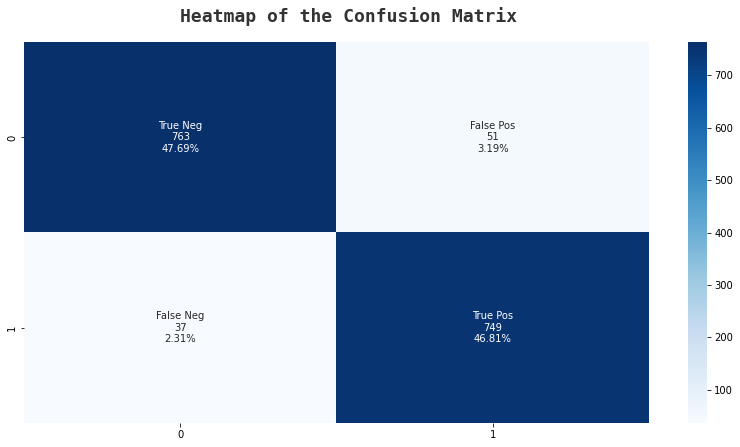

In [ ]:
import seaborn as sns
labels=['Cataract','Normal']
fig,ax=plt.subplots(1,1,figsize=(14,7))
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold', fontname='monospace',y=0.92,x=0.28,alpha=0.8)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
sns_plot.figure.savefig('/content/drive/MyDrive/heatmapofinception.png')
plt.show()


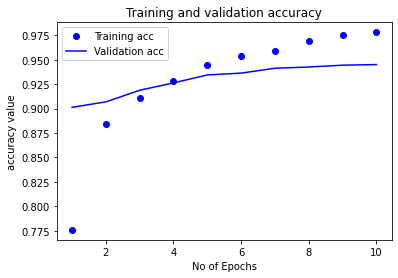

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("accuracy value")
plt.legend()
plt.figure()
plt.show()
plt.savefig("/content/drive/MyDrive/inceptiontraininggrapg.png")


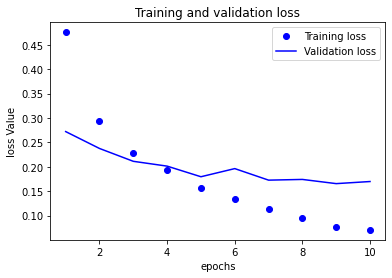

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("epochs")
plt.ylabel("loss Value")
plt.legend()
plt.show()
plt.savefig("/content/drive/MyDrive/inceptionvalidationimg.png")